In [1]:
using PyPlot, HDF5

In [2]:
nomine="180718_9.hf5"

"180718_9.hf5"

In [3]:
datos=h5open(nomine, "r")

HDF5 data file: 180718_9.hf5

In [4]:
names(datos)

5-element Array{String,1}:
 "Im_primaryIm_sec"
 "Im_sec"          
 "channels"        
 "comment"         
 "description"     

In [5]:
function devuelvedatos(h5datos, onchannel)
    #=
    Funcion que devuelve los trazos solamente
    como un dict
    =#
    result=Dict{String,Any}()
    if exists(h5datos, onchannel)
        aux=read(datos[onchannel])
        for (keys, values) in aux
            #println(keys)
            if keys=="section_00"
                println("la descripcion de tus barridas de datos son las siguientes")
                println(values["description"])
            end
            if keys != "description"
                result[keys]=values["data"]
            end
        end
        else
        println("no encontre el grupo que pediste")
        
    end
    return result
end
        

devuelvedatos (generic function with 1 method)

In [6]:
s=devuelvedatos(datos, "Im_primaryIm_sec")

la descripcion de tus barridas de datos son las siguientes
HDF5.HDF5Compound{3}[HDF5.HDF5Compound{3}((0.04, "ms", "mV"), ("dt", "xunits", "yunits"), (Float64, String, String))]


Dict{String,Any} with 59 entries:
  "section_57" => Float32[-65.3687, -65.3687, -65.3381, -65.3381, -65.3687, -65…
  "section_44" => Float32[-73.3337, -73.3337, -73.3337, -73.3337, -73.3337, -73…
  "section_06" => Float32[-69.397, -69.397, -69.397, -69.397, -69.4275, -69.427…
  "section_13" => Float32[-70.4346, -70.4346, -70.4346, -70.4346, -70.4041, -70…
  "section_17" => Float32[-69.8242, -69.8242, -69.8242, -69.7937, -69.7937, -69…
  "section_56" => Float32[-66.1316, -66.1316, -66.1316, -66.1316, -66.1621, -66…
  "section_12" => Float32[-70.1904, -70.1904, -70.1904, -70.1904, -70.1904, -70…
  "section_41" => Float32[-73.1201, -73.1201, -73.1201, -73.1201, -73.1506, -73…
  "section_16" => Float32[-70.1904, -70.1904, -70.1904, -70.1904, -70.1599, -70…
  "section_09" => Float32[-69.6716, -69.6716, -69.6716, -69.6716, -69.6716, -69…
  "section_58" => Float32[-64.8804, -64.8804, -64.8804, -64.8804, -64.8804, -64…
  "section_07" => Float32[-70.0684, -70.0684, -70.0684, -70.0378, -70.0378,

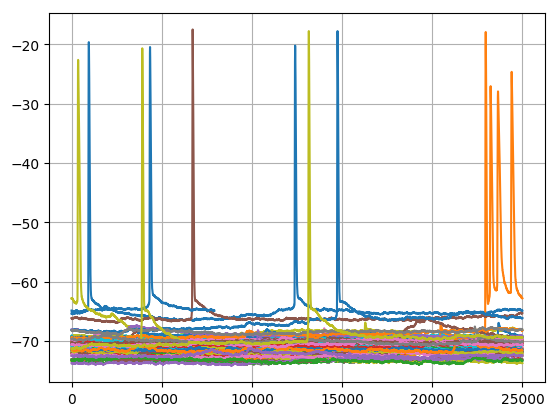

In [7]:
for dats in values(s)
    plot(dats)
end
grid()

In [8]:
keys(s)


Base.KeyIterator for a Dict{String,Any} with 59 entries. Keys:
  "section_57"
  "section_44"
  "section_06"
  "section_13"
  "section_17"
  "section_56"
  "section_12"
  "section_41"
  "section_16"
  "section_09"
  "section_58"
  "section_07"
  "section_43"
  "section_29"
  "section_39"
  "section_40"
  "section_10"
  "section_04"
  "section_45"
  "section_00"
  "section_32"
  "section_36"
  "section_47"
  "section_49"
  ⋮

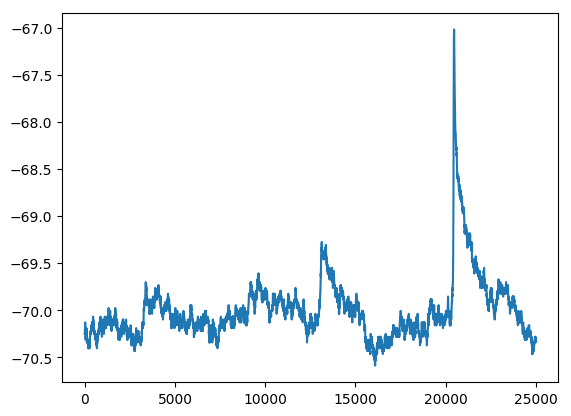

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f884cee5c18>

In [37]:
plot(s["section_14"])

In [17]:
ejemplo=s["section_14"]

25000-element Array{Float32,1}:
 -70.2515
 -70.2515
 -70.2515
 -70.2515
 -70.2209
 -70.2209
 -70.2209
 -70.2209
 -70.1904
 -70.1904
 -70.1904
 -70.1904
 -70.1904
   ⋮     
 -70.3125
 -70.3125
 -70.343 
 -70.343 
 -70.343 
 -70.343 
 -70.3125
 -70.3125
 -70.3125
 -70.3125
 -70.3125
 -70.3125

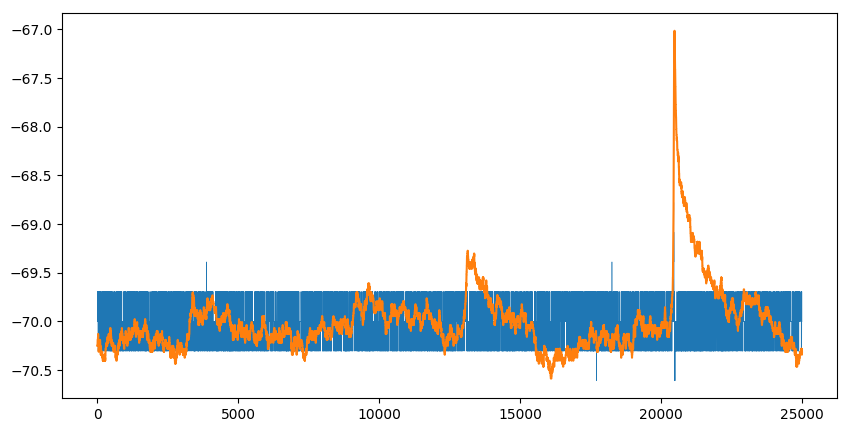

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f884d507dd8>

In [18]:
lala=diff(ejemplo)
figura=figure(figsize=(10,5))
plot((lala)*10-70, lw=0.4)
plot(ejemplo)

In [19]:
import PlotlyJS

PlotlyJS.plot(ejemplo, marker_color="blue", line_width=1)


In [50]:
function encuentraespigas(datos::Dict, umbral=-69.3)
   result = Dict{String, Any}()
    for (key,value) in datos
        aux=find(x->x>umbral, value)
        if length(aux)>0
            result[key]=aux
        end
    end
    return result
end

encuentraespigas (generic function with 2 methods)

In [51]:
pickIn = encuentraespigas(s);

In [52]:
function rasterplot(lespigas)
    # hace un rasterplot como diccionario a partir de una lista de espigas.
raster = Dict{Any, Any}() #preallocation
m = 0
while m <= length(s)
    # generar nombre de sweep
    if m < 10
        aux_0 = "section_0"
    else
        aux_0 = "section_"
    end
    aux0 = (string(aux_0,string(m)))
    m += 1
    #############################################################################################
    # what sweeps really have voltage values above the threshold
    aux_1 = get(pickIn, aux0, 0)
    if aux_1 == 0
        continue
    end
    #############################################################################################
    aux1 = parse(Int,replace(aux0, "section_" => ""))
    # obtener el voltaje de ese sweep
     ejemplo = s[aux0]; 
    # obtener los valores que sobrepasan el umbral de ese sweep
    selection = pickIn[aux0];
    # obtener los valores maximos de voltaje de ese sweep
    i = 1
    inicio = i
    j = 1
    for_raster = Dict{Any, Any}() #preallocation
    while i < length(selection)
        if selection[i + 1] == selection[i] + 1
            i += 1
        else
            fin = i
            trazo = selection[inicio:fin]
            voltaje = ejemplo[trazo]
            aux = findmax(voltaje)
            for_raster[j] = trazo[aux[2]]
            j += 1
            inicio = fin + 1
            i += 1
        end
    end
    trazo = selection[inicio:length(selection)]
    voltaje = ejemplo[trazo]
    aux = findmax(voltaje)
    for_raster[j] = trazo[aux[2]];
    ############
    entry0 = for_raster[1]
    for i = 2:length(for_raster)
        entry0 = [entry0 for_raster[i]]
    end
    ############
    raster[aux1] = [aux0 entry0] # se almacenan los valores maximos de voltaje registrados por cada sweep
end
    return raster 
end

rasterplot (generic function with 1 method)

In [53]:
raster=rasterplot(pickIn)

Dict{Any,Any} with 28 entries:
  18 => Any["section_18" 22357]
  30 => Any["section_30" 10342]
  52 => Any["section_52" 22759]
  50 => Any["section_50" 13157 … 24099 24107]
  54 => Any["section_54" 689 … 5488 24452]
  2  => Any["section_02" 16 … 23649 24149]
  16 => Any["section_16" 16285 … 17529 17561]
  11 => Any["section_11" 1248 … 1372 1810]
  0  => Any["section_00" 1597 … 24602 24665]
  7  => Any["section_07" 5841 … 5864 5881]
  9  => Any["section_09" 21278 … 22120 22124]
  10 => Any["section_10" 883 … 13002 13074]
  55 => Any["section_55" 14749]
  58 => Any["section_58" 4354]
  51 => Any["section_51" 1103 … 9582 23625]
  6  => Any["section_06" 15105 … 15310 15451]
  24 => Any["section_24" 14007 … 14554 14557]
  44 => Any["section_44" 22964]
  53 => Any["section_53" 3606 … 24648 24857]
  3  => Any["section_03" 3621 … 18427 18935]
  28 => Any["section_28" 21274]
  5  => Any["section_05" 19680 … 24275 24596]
  57 => Any["section_57" 959]
  45 => Any["section_45" 367 4138 4163]
  14 

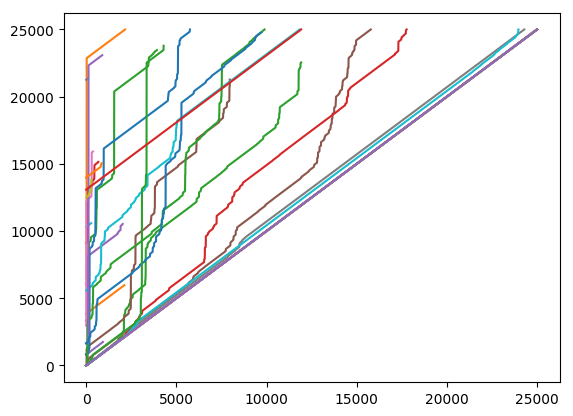

LoadError: [91mBoundsError: attempt to access 3927-element Array{Int64,1} at index [3928][39m

In [56]:
pico=findmax(ejemplo)

(-67.0166f0, 20475)

In [57]:
pico,lugarM=findmax(ejemplo)


(-67.0166f0, 20475)

In [58]:
lugarM


20475

In [60]:
valle,lugarVaux=findmin(ejemplo[lugarM-500:lugarM])
lugarV=lugarVaux+lugarM-500

20230

In [61]:
Subejemplo=ejemplo[lugarV:lugarM]

246-element Array{Float32,1}:
 -70.1599
 -70.1599
 -70.1294
 -70.1599
 -70.1599
 -70.1599
 -70.1599
 -70.1599
 -70.1599
 -70.1599
 -70.1599
 -70.1599
 -70.1599
   ⋮     
 -67.1387
 -67.1082
 -67.1082
 -67.0776
 -67.0776
 -67.0776
 -67.0471
 -67.0471
 -67.0471
 -67.0471
 -67.0471
 -67.0166

In [62]:
PlotlyJS.plot(Subejemplo, marker_color="blue", line_width=1)

In [64]:
Vel=diff(Subejemplo)

245-element Array{Float32,1}:
  0.0      
  0.0305176
 -0.0305176
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  ⋮        
  0.0      
  0.0305176
  0.0      
  0.0305176
  0.0      
  0.0      
  0.0305176
  0.0      
  0.0      
  0.0      
  0.0      
  0.0305176

In [65]:
PlotlyJS.plot(Vel, marker_color="blue", line_width=1)

In [68]:
Velosuabe=zeros(Vel)
for j=3:length(Vel)-3
    Velosuabe[j]=sum(Vel[j-2:j+2])/5
end
    

In [69]:
PlotlyJS.plot(Velosuabe, marker_color="blue", line_width=1)

In [74]:
HumbralVel=15*mean(Velosuabe[1:150])

0.032348633f0

Aqui vamos a sacar el promedio (*15) de la velocidad de cambio basal segun bla **n** *h* $\int dx =1 $

In [76]:
aux3=find(x->x>HumbralVel, Velosuabe)[1]

201